<a href="https://colab.research.google.com/github/Aniket-23/Deep-Learning/blob/master/feedforward_neural_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**What is meant by feedforward ?**

Feedforward in a neural network refers to the flow of information through the network in a forward direction, from the input layer to the output layer, without any feedback loops. It is the fundamental process of passing input data through the network to obtain the corresponding output or prediction.

During the feedforward process, each neuron in a neural network receives input signals from the previous layer, performs a weighted sum of the inputs, applies an activation function to produce an output, and passes the output to the neurons in the next layer. This propagation of information continues until the output layer is reached, where the final prediction or output of the network is generated.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

### About Dataset
#### Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.
#### Content
The datasets consists of several medical predictor variables and one target variable, `Outcome`. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.
#### Acknowledgement
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

In [ ]:
df = pd.read_csv('dataset/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

The dataset contains no null values.

It's always a good idea to do some sort of data visualization on these values, to see whether or not these values have some sort of correlation to the outcome.

So next up, we will plot each value in the features as histogram and compare it against the outcome.

In [ ]:
print("Diabetes positive: {}\nDiabetes negative: {}".format(len(df[df["Outcome"]==1]), len(df[df["Outcome"]==0])))

Diabetes positive: 268
Diabetes negative: 500


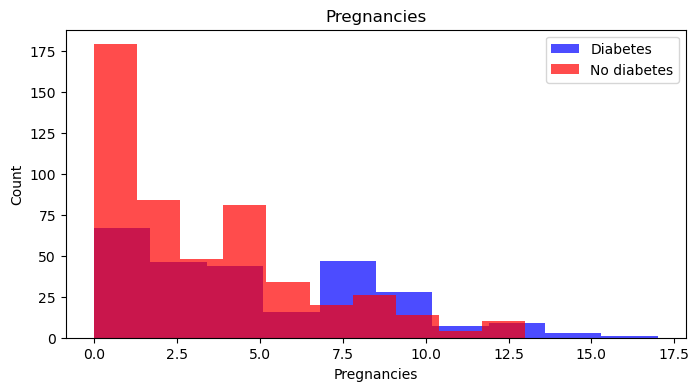

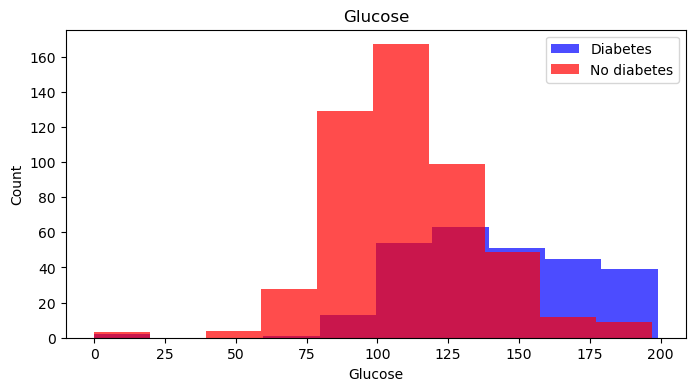

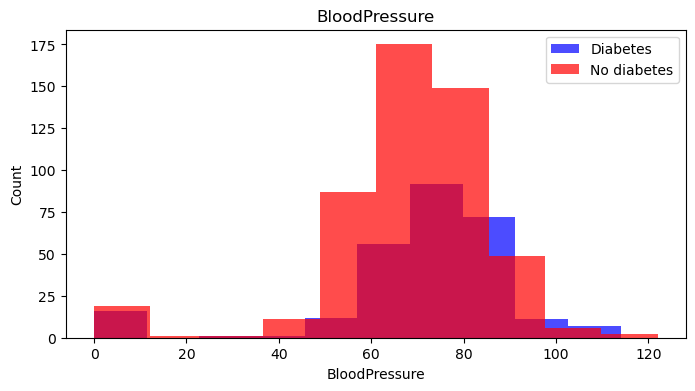

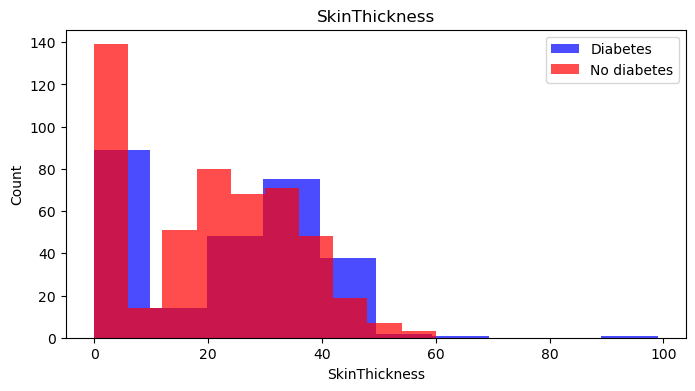

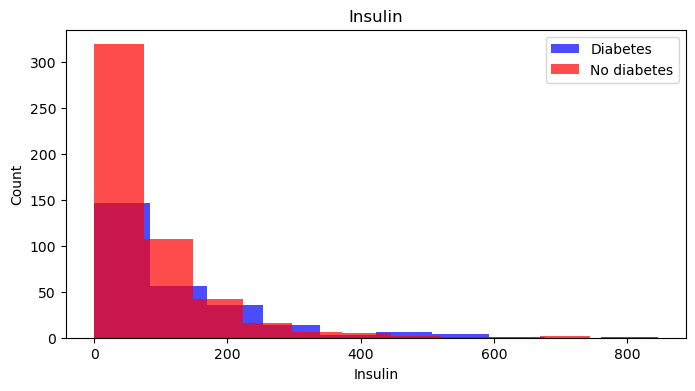

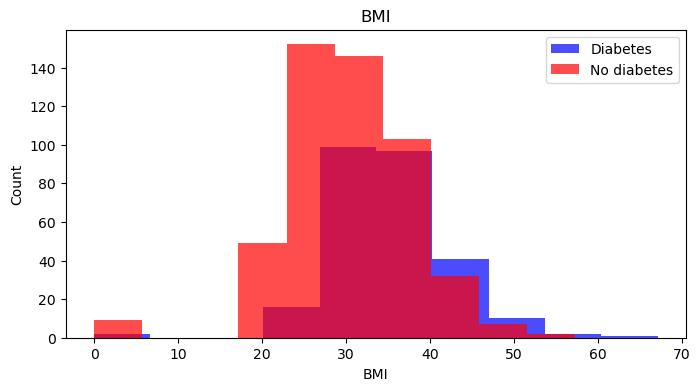

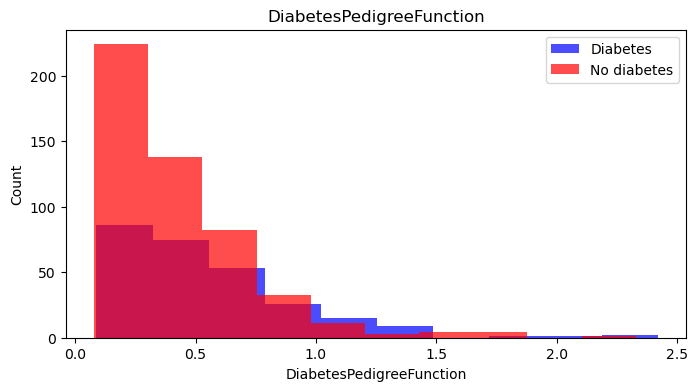

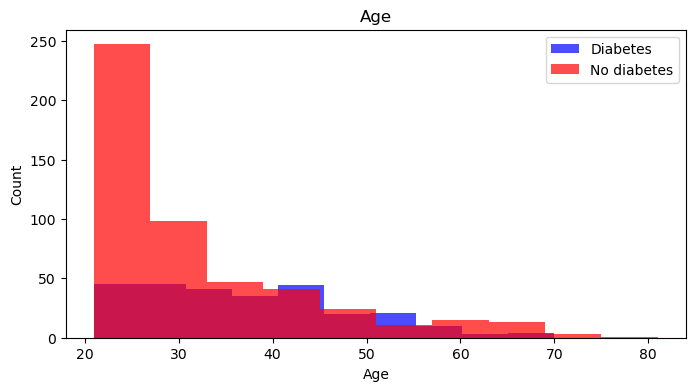

In [ ]:
for i in range(len(df.columns[:-1])): #we are going to use all the columns except the last one because we are going to compare against it
    label = df.columns[i] #stores the column name as label for a given loop
    plt.figure(figsize=(8, 4))
    plt.hist(df[df["Outcome"]==1][label], color='blue', label='Diabetes', alpha=0.7) # plot the histogram where the female is diabetic, against the label
    plt.hist(df[df["Outcome"]==0][label], color='red', label='No diabetes', alpha=0.7) # plot the histogram where the female is not diabetic, against the label
    plt.title(label)
    plt.ylabel('Count')
    plt.xlabel(label)
    plt.legend()
    plt.show()

Now, rather than having a count of each column, let's see the probability of each. We can do this by normalizing the values using the `density` feature of the matplotlib.

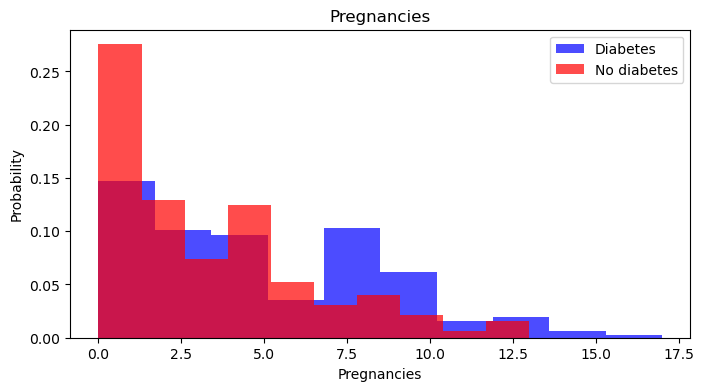

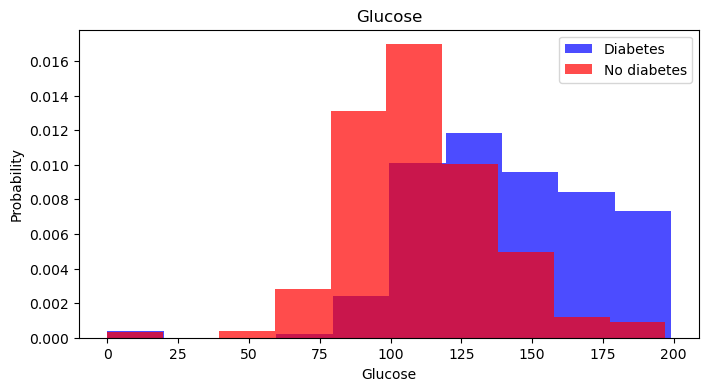

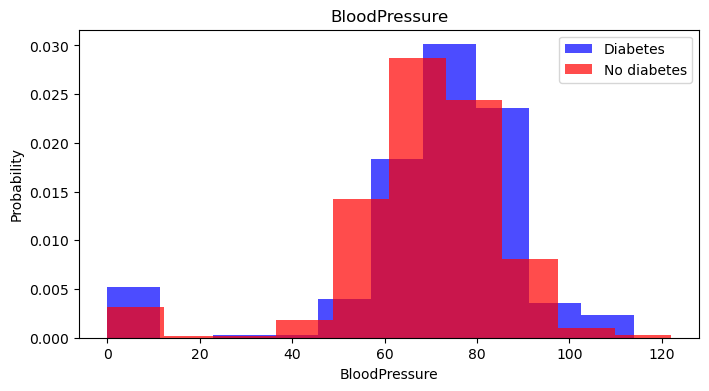

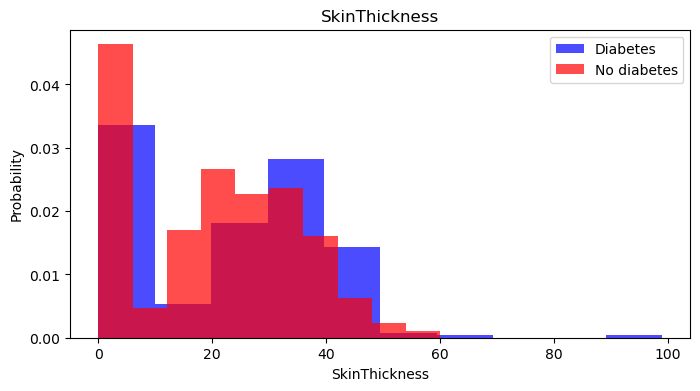

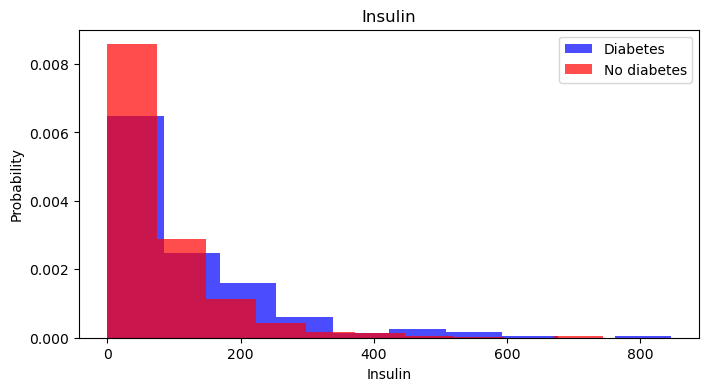

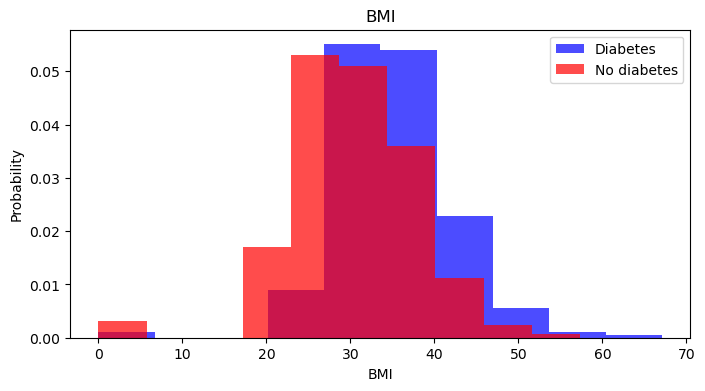

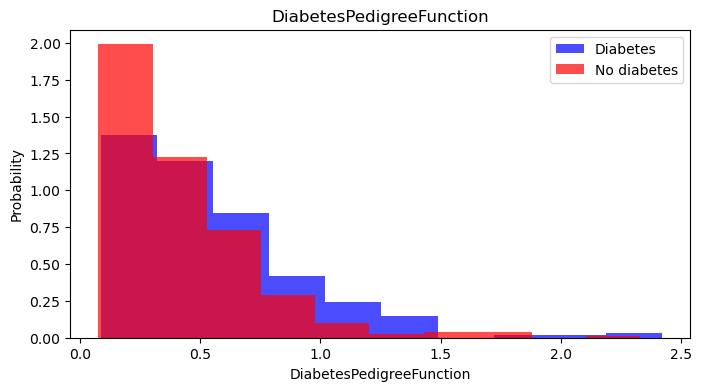

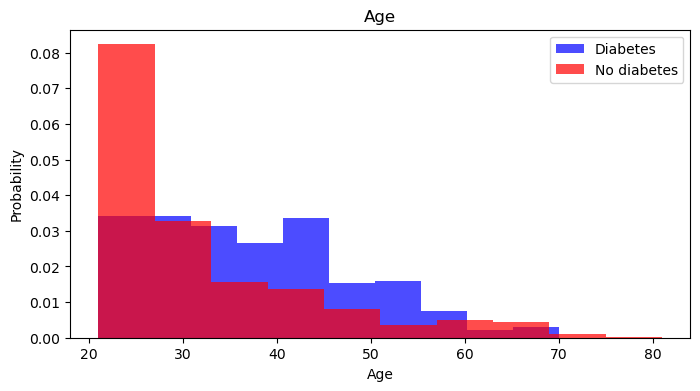

In [ ]:
for i in range(len(df.columns[:-1])):
    label = df.columns[i]
    plt.figure(figsize=(8, 4))
    plt.hist(df[df["Outcome"]==1][label], color='blue', label='Diabetes', alpha=0.7, density=True)
    plt.hist(df[df["Outcome"]==0][label], color='red', label='No diabetes', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

From the above gained graphs, we can draw some conclusions such as:

1. With the increase in the number of pregnancies, there is a decrease in the possibility of `no diabetes`.
2. People with high glucose tend to be more diabetic.
3. Both the diabetic and no diabetic categories have almost equal variability in blood pressure.
4. People who are diabetic tend to be thick-skinned. Although there is a probablility of thin-skinned people to be diabetic.
5. Both the diabetic and no diabetic categories have almost equal variability in insulin.
6. People with higher BMI tend to be more diabetic.
7. Anyone between the age of 20 and 70 can be diabetic, at any given age.

Throughout this graph interpretation, whatever conclusions have been drawn so far, are merely conclusions drawn by a human (with high inaccuracy). This is where we use **Machine Learning**, to learn from the data, draw conclusions and to predict in the future, if there are any more new inputs.

In [ ]:
X = df[df.columns[:-1]].values
X # a 2D array consisting of all the values of all the features except the outcome feature

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [ ]:
y = df[df.columns[-1]].values
y # a 1D array consisting only of outcome feature's values

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

Now we will split these up into training and testing datasets. For that, we need to import model_selection from sklearn.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0)
"""test_size=0.4 means that we are splitting our dataset into the ratio of 6:4, where our testing dataset will consist of
40% of the original dataset."""
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)
# now we have furthur halved the testing dataset - X_temp, y_temp, into validation and testing dataset

Next up, we will build our neural net model

We will use keras in order to do so. Keras is an API of TensorFlow that helps us build our neural network model.
Sequential groups a linear stack of layers into a `tf.keras.Model`, and neural network is nothing but a stack of layers connecting different nodes.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'), #this creates a dense layer consisting of 16 nodes.
    #relu: if x<=0 -> 0; if x>0 -> x
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') # an output layer of only 1 node which maps the output into either 0 or 1
    #using sigmoid function
])

Now, we are going to compile our model. There are a few parameters that we need to take care of inside a compile function.

First one is `optimizer` that needs to be set. There are many optimizers that are being offered by TensorFlow. And the answer to the question : *Which optimizer to use?* is still unknown. Basically the approach taken by a mojority of people in this field is that of *trial and error*. We are going to use the **Adam** optimizer. This is also an optimizer offered by TensorFlow and it is one of the most commonly used one.

The second parameter that we need to define is our loss function using `loss`. Since we are doing binary conversion for the output (using `sigmoid` function), we are going to use the `BinaryCrossentropy` for that. There is no need to dive deeper into this at an early stage of learning TensorFlow. All we need to know is that it is `BinaryCrossentropy` that is used to handle binary outputs.

Finally we will the `metrics` for accuracy to know how many predictions did we actually get right.

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss=tf.keras.losses.BinaryCrossentropy(),
             metrics=['accuracy'])

We now have a compiled model of neural net that we can feed data to and train.

But before doing that, let's evaluate our model for it's accuracy and loss.

In [ ]:
model.evaluate(X_train, y_train)

15/15 [==============================] - 1s 9ms/step - loss: 6.8366 - accuracy: 0.3696


[6.836618423461914, 0.3695652186870575]

For our training dataset, we are getting a loss of 54 and an accuracy of only 35% which is pretty bad.

In [ ]:
model.evaluate(X_valid, y_valid)

5/5 [==============================] - 0s 3ms/step - loss: 6.7982 - accuracy: 0.3766


[6.7981648445129395, 0.37662336230278015]

The loss in the case of validation dataset is also very similar and equally bad.

This is because our model has not seen our training or validation dataset, and has not done any training yet.

For this `fit` is used. It takes the X_train as the input data and y_train as the corresponding target labels for the training data.

`batch_size` is used to specify the number of samples to be used in each training batch. The model will update its weights and biases after processing every 16 samples. It is often used to improve the training efficiency and generalize the learning process.

`epochs` are used to specify the number of times the training dataset (X_train and y_train) will be passed forward and backward through the model during training. Each pass through the entire dataset is known as one epoch. Training for multiple epochs allow the model to learn from the data iteratively and potentially improve its performance over time.

`validation_data` is used to evaluate the model's performance on a separate validation dataset during training. The validation data is not used for training the model but to assess the model's performance and generalization on unseen data.

In [ ]:
model.fit(X_train, y_train, batch_size=16, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
29/29 [==============================] - 1s 8ms/step - loss: 3.3202 - accuracy: 0.4957 - val_loss: 2.5041 - val_accuracy: 0.4935
Epoch 2/20
29/29 [==============================] - 0s 4ms/step - loss: 1.7352 - accuracy: 0.4826 - val_loss: 1.5810 - val_accuracy: 0.4156
Epoch 3/20
29/29 [==============================] - 0s 4ms/step - loss: 1.1790 - accuracy: 0.5174 - val_loss: 1.0829 - val_accuracy: 0.4870
Epoch 4/20
29/29 [==============================] - 0s 5ms/step - loss: 0.8815 - accuracy: 0.5826 - val_loss: 0.9084 - val_accuracy: 0.5519
Epoch 5/20
29/29 [==============================] - 0s 5ms/step - loss: 0.7891 - accuracy: 0.6348 - val_loss: 0.7809 - val_accuracy: 0.6039
Epoch 6/20
29/29 [==============================] - 0s 7ms/step - loss: 0.7506 - accuracy: 0.6283 - val_loss: 0.7591 - val_accuracy: 0.5519
Epoch 7/20
29/29 [==============================] - 0s 4ms/step - loss: 0.6809 - accuracy: 0.6609 - val_loss: 0.6772 - val_accuracy: 0.7143
Epoch 8/20
29/29 [==

As we can see in the output above, both of our training and validation loss has decreased and the training and validation accuracy has increased through epochs. But they are still not upto the mark. At least not to the mark of a neural network.

*So what could cause this?*

If we go back and evaluate the x-axes of the histograms plotted above we can see that their range is quite varaible with the different features. Such as, in case of `insulin` the highest value is 800 whereas in case of `DiabetesPedigreeFunction` the highest range is only 2.5. So, this could be messing up our model. It can be fixed by scaling them using `StandardScaler` from `sklearn`.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

Now, everything has been scaled into numbers that are a lot closer in range.

In [ ]:
type(X)

numpy.ndarray

In [ ]:
X.shape, y.shape

((768, 8), (768,))

Let's plot these back to see the difference. Before that, we will need to transform X back into a dataframe. For that we need to horizontally stack X and y together. And to stack them together, both X and y need to be a 2D array.

In [ ]:
data = np.hstack((X, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns) # creating a dataframe with a placeholder data

`hstack` is used to horizontally stack arrays along the columns. It concatenates arrays X (input data) and y (target labels).

`transformed_df` is a pandas DataFrame that is created using the stacked array data and assigning column names from `df.columns`.

In [ ]:
transformed_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1.0
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0.0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1.0
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0.0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1.0
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136,0.0
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023,0.0
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760,0.0
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732,1.0


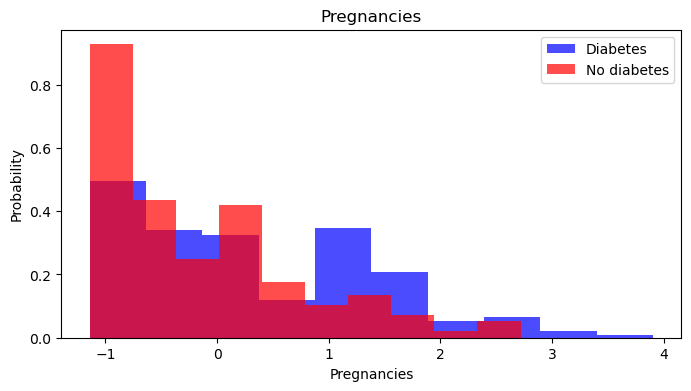

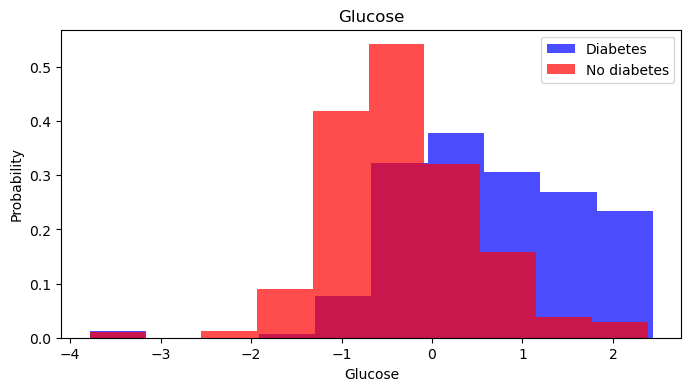

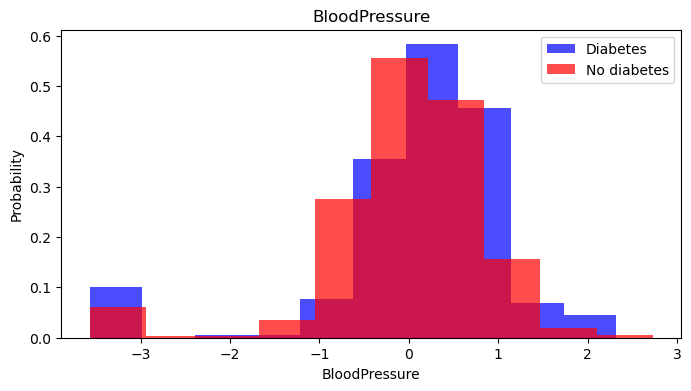

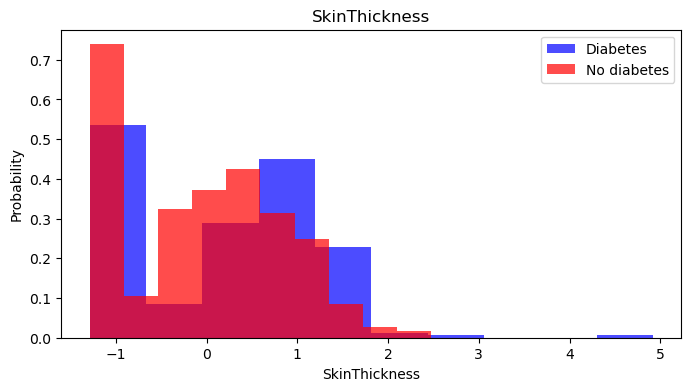

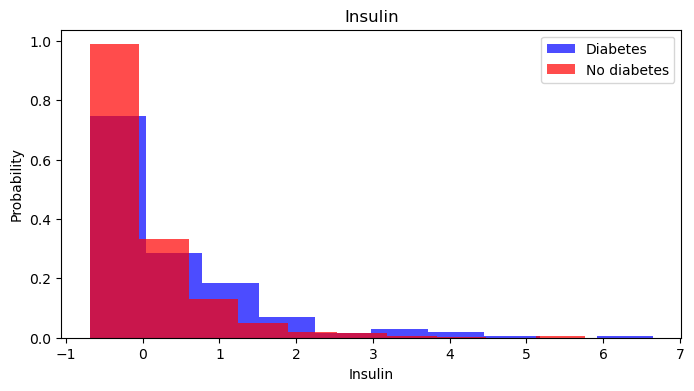

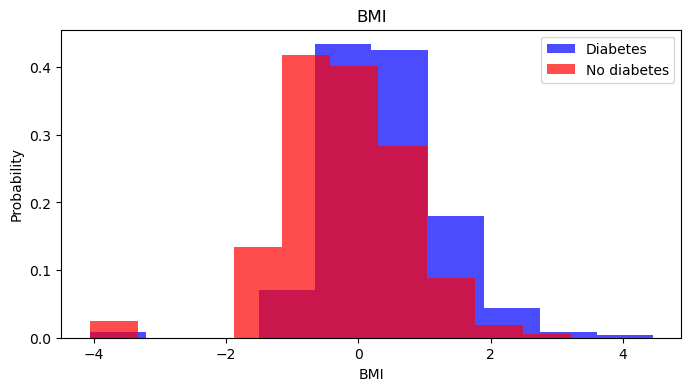

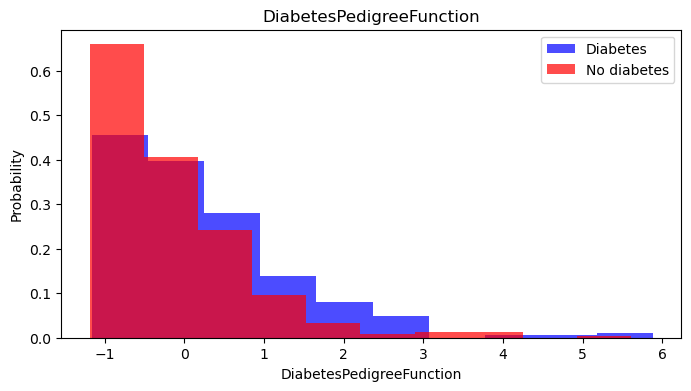

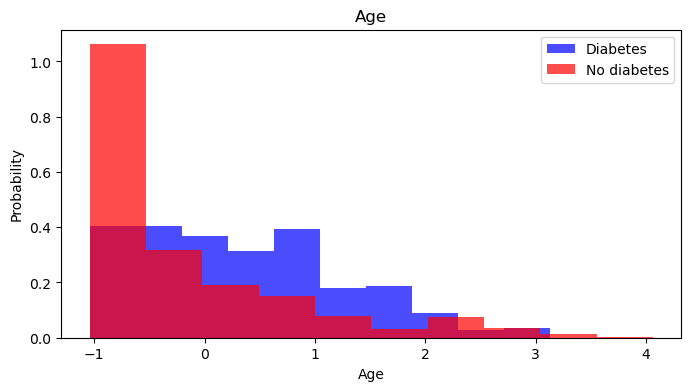

In [ ]:
for i in range(len(transformed_df.columns[:-1])):
    label = transformed_df.columns[i]
    plt.figure(figsize=(8, 4))
    plt.hist(transformed_df[transformed_df["Outcome"]==1][label], color='blue', label='Diabetes', alpha=0.7, density=True)
    plt.hist(transformed_df[transformed_df["Outcome"]==0][label], color='red', label='No diabetes', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

What `StandardScaler` does is that it normalizes the values of the features so that they all remain within a well defined range. It maps our values to a normal distribution.

In [ ]:
len(transformed_df[transformed_df["Outcome"]==1]), len(transformed_df[transformed_df["Outcome"]==0])

(268, 500)

Since there is also a huge gap between the total number of outcomes of the two different cases (diabetes and no diabetes), that could also be the reason for inaccuracy in our model. This could be solved by using `RandomOverSampler`, using which we will try to get these values to be equal, by oversampling the data.

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
over = RandomOverSampler()
X, y = over.fit_resample(X, y)
data = np.hstack((X, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [ ]:
len(transformed_df[transformed_df["Outcome"]==1]), len(transformed_df[transformed_df["Outcome"]==0])

(500, 500)

Now, our dataset is balanced in terms of outcome.

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0)
"""test_size=0.4 means that we are splitting our dataset into the ratio of 6:4, where our testing dataset will consist of
40% of the original dataset."""
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)
# now we have furthur halved the testing dataset - X_temp, y_temp, into validation and testing dataset

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'), #this creates a dense layer consisting of 16 nodes.
    #relu: if x<=0 -> 0; if x>0 -> x
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') # an output layer of only 1 node which maps the output into either 0 or 1
    #using sigmoid function
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss=tf.keras.losses.BinaryCrossentropy(),
             metrics=['accuracy'])

In [ ]:
model.evaluate(X_train, y_train)

19/19 [==============================] - 0s 2ms/step - loss: 0.6682 - accuracy: 0.6083


[0.668239414691925, 0.6083333492279053]

In [ ]:
model.evaluate(X_valid, y_valid)

7/7 [==============================] - 0s 2ms/step - loss: 0.6666 - accuracy: 0.6450


[0.666550874710083, 0.6449999809265137]

But ALAS! Our accuracy has furthur dropped to almost 50%. What could be the reason for it. Is it because we oversampled till both the values we equal? Or is it because we have not trained our model for the scaled value? Let's check it out.

In [ ]:
model.fit(X_train, y_train, batch_size=16, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
38/38 [==============================] - 1s 5ms/step - loss: 0.6538 - accuracy: 0.6250 - val_loss: 0.6340 - val_accuracy: 0.6750
Epoch 2/20
38/38 [==============================] - 0s 5ms/step - loss: 0.6236 - accuracy: 0.6717 - val_loss: 0.6074 - val_accuracy: 0.7100
Epoch 3/20
38/38 [==============================] - 0s 8ms/step - loss: 0.5993 - accuracy: 0.6950 - val_loss: 0.5841 - val_accuracy: 0.7500
Epoch 4/20
38/38 [==============================] - 0s 8ms/step - loss: 0.5793 - accuracy: 0.7083 - val_loss: 0.5607 - val_accuracy: 0.7600
Epoch 5/20
38/38 [==============================] - 0s 10ms/step - loss: 0.5627 - accuracy: 0.7267 - val_loss: 0.5435 - val_accuracy: 0.7800
Epoch 6/20
38/38 [==============================] - 0s 8ms/step - loss: 0.5505 - accuracy: 0.7233 - val_loss: 0.5256 - val_accuracy: 0.7750
Epoch 7/20
38/38 [==============================] - 0s 5ms/step - loss: 0.5406 - accuracy: 0.7300 - val_loss: 0.5136 - val_accuracy: 0.7850
Epoch 8/20
38/38 [=

Now, both the losses have decreased and the accuracies have increased to a much higher range. Are we satisfied? Yes. Why not. It is a significant improvement after all.

The last thing that is left to do is to evaluate our model on testing data

In [ ]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.4663 - accuracy: 0.7850


[0.4662999212741852, 0.7850000262260437]

Yes. We get an accuracy of 79% for a data that our model has never seen before. It is pretty good for our first tensorflow model.